# Daten herunterladen: https://shop.swisstopo.admin.ch/de/products/landscape/names3D

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import re

In [2]:
# Daten einlesen
gdf = gpd.read_file('shp_LV95_LN02/swissNAMES3D_PKT.shx')


In [3]:
gdf

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
0,{2FF7E3F1-6BAA-4981-A172-A459E01982E8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694037.021 1273364.505 389.545)
1,{AA4D0B0F-CA43-4B91-BFC3-32B9F3E2FEDB},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694225.446 1272960.581 386.701)
2,{358C0BD3-3DF7-4A49-B446-F156A2D3D865},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{D723A8F6-7E97-41D0-B042-0935835A017A},Winterthur-Töss,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695211.064 1260578.998 436.378)
3,{C4D61C3F-4A22-4474-9FD8-9532845AFFF4},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694252.651 1263268.638 412.791)
4,{082BA123-C0B5-47E3-9D86-8AC0DFD1025F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694494.016 1263591.783 427.094)
5,{674B9162-0FCF-4972-B9A3-FDB9AFE55E89},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694852.543 1264108.073 438.363)
6,{ACF238B8-5177-4239-ACD1-B402F60F5920},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695091.488 1264580.048 432.101)
7,{1D10A30D-3B35-43AA-9F9D-6DD102D16B58},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695409.576 1264572.464 442.853)
8,{8E730905-A989-4D50-B921-2B8E4BDD5E5F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695995.191 1264426.583 458.974)
9,{F36B1E8E-978A-4F18-9060-41B7F8BF2169},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2696459.446 1264408.235 472.927)


In [4]:
gdf.shape

(308200, 12)

In [5]:
gdf.dtypes

UUID            object
OBJEKTART       object
OBJEKTKLAS      object
HOEHE          float64
GEBAEUDENU      object
NAME_UUID       object
NAME            object
STATUS          object
SPRACHCODE      object
NAMEN_TYP       object
NAMENGRUPP      object
geometry      geometry
dtype: object

In [ ]:
## Daten in String umwandeln ?????????????
##gdf.to_string(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, line_width=None, max_rows=None, max_cols=None, show_dimensions=False)

In [6]:
gdf['NAME'].unique()

array(['Kleinandelfingen', 'Winterthur-Töss', 'Wülflingen', ...,
       'Alpstubli', 'Illighausen 300m', 'Relais Fermier La Soldanelle'],
      dtype=object)

In [7]:
gdf['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [8]:
gdf[gdf['OBJEKTART'] == 'Huegel']

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
281919,{0445F624-C20E-45FF-95D7-2A4D0E20B00A},Huegel,TLM_NAME_PKT,526.0,k_W,{A39DD568-618C-4265-A545-5F248862343D},Forrenbuck,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2690030.975 1267690.954 526.223)
282098,{3E95B505-B2D9-4E4C-A007-527AC0878D43},Huegel,TLM_NAME_PKT,510.0,k_W,{0F6520C0-BF74-4D97-81FA-5CB0D682A56A},Tierget,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2748349.450 1214472.571 510.065)
282108,{D6B869BB-676B-4954-8A24-DF4258A38600},Huegel,TLM_NAME_PKT,531.0,k_W,{716E0BD0-6742-4061-B08D-E7CCD44ADFD0},Chrääspel,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2702463.810 1272610.728 531.317)
282109,{DFA8B81B-5DB3-4BD0-9456-7DE49409D0CA},Huegel,TLM_NAME_PKT,443.0,k_W,{5BE4DB85-C82C-46D6-A624-DDBE8FE08402},Schalmebuck,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2710698.080 1272857.749 442.880)
282110,{F438359F-DE3D-487C-B16D-3BED8BAF3D33},Huegel,TLM_NAME_PKT,464.0,k_W,{11939A78-3407-40EB-9C20-BFD9DD927267},Hoppelibüel,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2708251.709 1272914.639 463.887)
282111,{E14D79E6-4791-4DF8-B2A1-D0D22F8EB5ED},Huegel,TLM_NAME_PKT,454.0,k_W,{325E3111-F05C-4900-85BC-6F7D2CCA8D22},Mülibuck,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2710176.031 1273012.606 454.011)
282112,{2F2BD865-05CC-46B1-8A24-C0A6B2CEA418},Huegel,TLM_NAME_PKT,499.0,k_W,{5648E568-8512-4893-92E5-7E87756E816D},Huebbüel,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2706624.385 1273071.410 499.326)
282748,{B7FEE82D-2339-4057-8891-2D1511A40E6D},Huegel,TLM_NAME_PKT,605.0,k_W,{5A7E6FC8-E3ED-4198-B632-CA8A6ED8F453},Tuma Marchesa,offiziell,Rumantsch Grischun inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2753323.561 1188477.006 605.295)
282750,{8883D328-A9BF-4ABE-83B8-60DAD9A4C7AC},Huegel,TLM_NAME_PKT,621.0,k_W,{B2DE85F6-3D1E-4BD9-9C72-B5F54CA89EC7},Tuma Carpusa,offiziell,Rumantsch Grischun inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2752521.499 1188590.520 621.144)
282752,{84246220-DE0E-4A1A-8F59-DA3090C7E10B},Huegel,TLM_NAME_PKT,623.0,k_W,{A8B6A264-4433-4ADB-B8F8-3EE6D832240D},Tuma Falveng,offiziell,Rumantsch Grischun inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2753706.949 1188633.763 622.968)


In [9]:
len(gdf[gdf['OBJEKTART'] == 'Huegel'])

2141

In [10]:
gdf_name = gdf[gdf['NAME'] == 'Albis']

In [11]:
gdf_name

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
81462,{E9C5C0AD-4926-4639-A9DF-19F52928A592},Flurname swisstopo,TLM_FLURNAME,-999998.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2638646.705 1261485.237 536.293)
132242,{7A40774E-8256-4305-B443-1E89560B40F3},Flurname swisstopo,TLM_FLURNAME,-999998.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694526.589 1226205.185 747.151)
284368,{39DEC8FB-780C-4D43-B2AA-5237F4C22634},Huegel,TLM_NAME_PKT,512.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2637581.334 1234429.066 512.001)


In [14]:
gdf_kantone = gpd.read_file('Projections/shp/g1k17.shp')

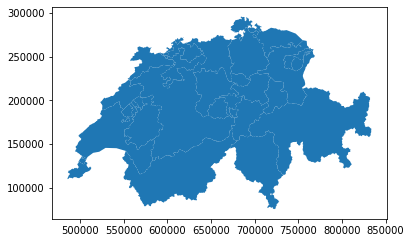

In [15]:
gdf_kantone.plot()

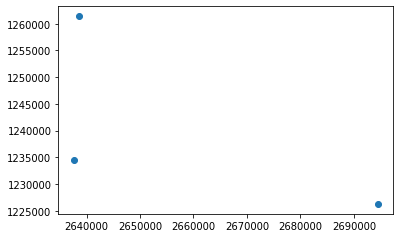

In [17]:
gdf_name.plot()

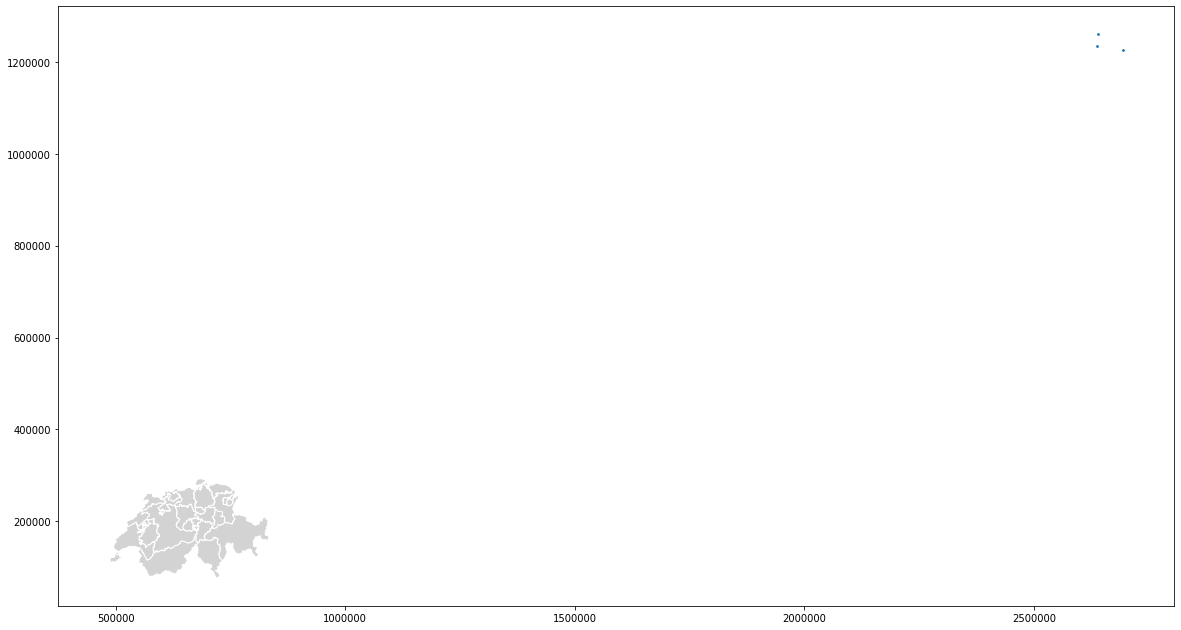

In [18]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
gdf_name.plot(markersize=3, ax=ax)

In [19]:
gdf_kantone.crs

{'init': 'epsg:21781'}

In [20]:
gdf_name.crs 

{'init': 'epsg:2056'}

In [21]:
gdf_name = gdf_name.to_crs({'init': 'epsg:21781'})

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [22]:
gdf_name

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
81462,{E9C5C0AD-4926-4639-A9DF-19F52928A592},Flurname swisstopo,TLM_FLURNAME,-999998.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (638646.705 261485.237 536.293)
132242,{7A40774E-8256-4305-B443-1E89560B40F3},Flurname swisstopo,TLM_FLURNAME,-999998.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (694526.589 226205.185 747.151)
284368,{39DEC8FB-780C-4D43-B2AA-5237F4C22634},Huegel,TLM_NAME_PKT,512.0,k_W,{3945490D-82EC-43F1-B76D-43C659442AA4},Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (637581.334 234429.066 512.001)


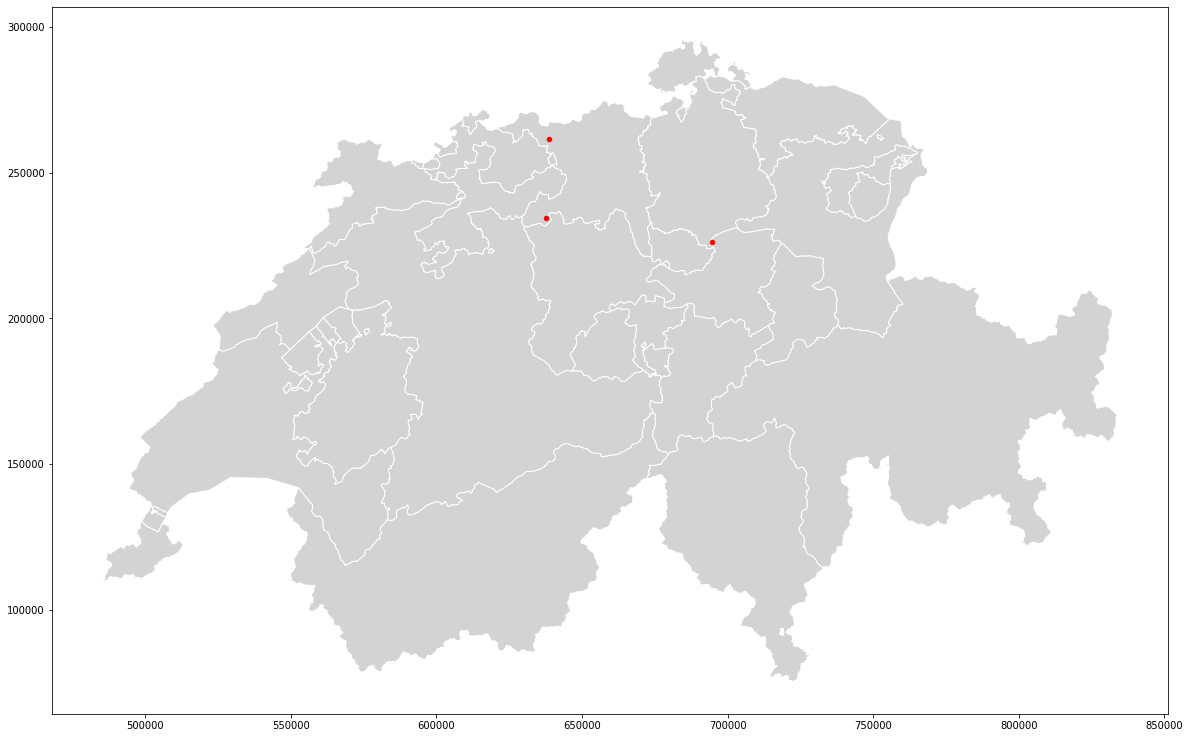

In [27]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
gdf_name.plot(markersize=20, color='red', ax=ax)